In [7]:
#importing the required libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot , plot

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df = pd.read_csv("/content/drive/MyDrive/fourth-sem/sem-LONG-project/portfolio_data.csv")

In [ ]:
df.head(5)

,Date,AMZN,DPZ,BTC,NFLX
0,5/1/2013,248.229996,51.190983,106.250000,30.415714
1,5/2/2013,252.550003,51.987320,98.099998,30.641428
2,5/3/2013,258.049988,52.446388,112.900002,30.492857
3,5/6/2013,255.720001,53.205257,109.599998,30.098572
4,5/7/2013,257.730011,54.151505,113.199997,29.464285


In [9]:
netflix = df.reset_index()['NFLX']
amazon = df.reset_index()['AMZN']

In [10]:
netflix = np.array(netflix)
amazon = np.array(amazon)

In [11]:
netflix = netflix.reshape(-1,1)
amazon = amazon.reshape(-1,1)

In [12]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
preprocessed_netflix = sc.fit_transform(netflix)
preprocessed_amazon = sc.fit_transform(amazon)

In [13]:
def form_dataset(dataset , time_step = 1):
  X , y = [] , []
  for i in range(len(dataset) - time_step):
    a = dataset[i:(i+time_step) , 0]
    X.append(a)
    y.append(dataset[i+time_step , 0])
  return np.array(X) , np.array(y)

In [ ]:
preprocessed_amazon.shape

(1520, 1)

In [14]:
train_size_n = int(0.7*len(preprocessed_netflix))
train_size_a = int(0.7*len(preprocessed_amazon))


In [15]:
train_data_n = preprocessed_netflix[:train_size_n]
train_data_a = preprocessed_amazon[:train_size_a]

In [ ]:
train_data_a.shape

(1064, 1)

In [16]:
time_step = 100
X_netflix_train , y_netflix_train = form_dataset(train_data_n , time_step)
X_amazon_train , y_amazon_train = form_dataset(train_data_a , time_step)

In [17]:
X_netflix_train = X_netflix_train.reshape(X_netflix_train.shape[0] , X_netflix_train.shape[1] , 1)
X_amazon_train = X_amazon_train.reshape(X_amazon_train.shape[0] , X_amazon_train.shape[1] , 1)

In [18]:
from keras.models import Sequential
from keras.layers import LSTM , Dense

In [ ]:
model = Sequential()
model.add(LSTM(75 , return_sequences = True , input_shape = (100,1)))
model.add(LSTM(75 , return_sequences = True))
model.add(LSTM(75))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error' , optimizer = 'adam')

In [19]:
seq = Sequential()
seq.add(LSTM(75 , return_sequences = True , input_shape=(100,1)))
seq.add(LSTM(75 , return_sequences = True))
seq.add(LSTM(75))
seq.add(Dense(1))
seq.compile(loss = 'mean_squared_error' , optimizer = 'adam')

In [ ]:
model.fit(X_netflix_train , y_netflix_train , epochs = 100 , batch_size = 64 , verbose = 1)

Epoch 1/100
16/16 [==============================] - 7s 23ms/step - loss: 0.0075
Epoch 2/100
16/16 [==============================] - 0s 13ms/step - loss: 0.0012
Epoch 3/100
16/16 [==============================] - 0s 13ms/step - loss: 4.3194e-04
Epoch 4/100
16/16 [==============================] - 0s 13ms/step - loss: 3.2148e-04
Epoch 5/100
16/16 [==============================] - 0s 13ms/step - loss: 3.0216e-04
Epoch 6/100
16/16 [==============================] - 0s 13ms/step - loss: 2.9536e-04
Epoch 7/100
16/16 [==============================] - 0s 13ms/step - loss: 3.1287e-04
Epoch 8/100
16/16 [==============================] - 0s 13ms/step - loss: 2.8277e-04
Epoch 9/100
16/16 [==============================] - 0s 13ms/step - loss: 2.8717e-04
Epoch 10/100
16/16 [==============================] - 0s 13ms/step - loss: 3.0569e-04
Epoch 11/100
16/16 [==============================] - 0s 13ms/step - loss: 2.7322e-04
Epoch 12/100
16/16 [==============================] - 0s 13ms/step - lo

In [20]:
seq.fit(X_amazon_train , y_amazon_train , epochs = 100 , verbose = 1 , batch_size = 64)

Epoch 1/100
16/16 [==============================] - 12s 21ms/step - loss: 0.0093
Epoch 2/100
16/16 [==============================] - 0s 13ms/step - loss: 8.7328e-04
Epoch 3/100
16/16 [==============================] - 0s 13ms/step - loss: 3.1901e-04
Epoch 4/100
16/16 [==============================] - 0s 13ms/step - loss: 2.0507e-04
Epoch 5/100
16/16 [==============================] - 0s 13ms/step - loss: 2.0146e-04
Epoch 6/100
16/16 [==============================] - 0s 13ms/step - loss: 2.0169e-04
Epoch 7/100
16/16 [==============================] - 0s 15ms/step - loss: 2.0133e-04
Epoch 8/100
16/16 [==============================] - 0s 13ms/step - loss: 1.9190e-04
Epoch 9/100
16/16 [==============================] - 0s 13ms/step - loss: 1.9469e-04
Epoch 10/100
16/16 [==============================] - 0s 13ms/step - loss: 1.8758e-04
Epoch 11/100
16/16 [==============================] - 0s 13ms/step - loss: 1.9351e-04
Epoch 12/100
16/16 [==============================] - 0s 12ms/step

In [21]:
test_netflix = preprocessed_netflix[train_size_n:]
test_amazon = preprocessed_amazon[train_size_a:]

In [22]:
X_test_netflix , y_test_netflix = form_dataset(test_netflix , time_step)
X_test_amazon , y_test_amazon = form_dataset(test_amazon , time_step)

In [23]:
X_test_netflix = X_test_netflix.reshape(X_test_netflix.shape[0], X_test_netflix.shape[1] , 1)
X_test_amazon = X_test_amazon.reshape(X_test_amazon.shape[0] , X_test_amazon.shape[1] , 1)
np.random.seed(42)
preds_netflix = model.predict(X_test_netflix)
preds_netflix_train = model.predict(X_netflix_train)

In [24]:
np.random.seed(42)
preds_amazon = seq.predict(X_test_amazon)
preds_amazon_train = seq.predict(X_amazon_train)

31/31 [==============================] - 0s 9ms/step


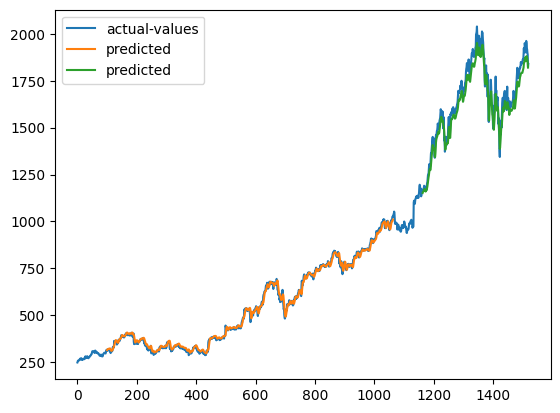

In [25]:
preds_1 = sc.inverse_transform(preds_amazon_train)
preds_2 = sc.inverse_transform(preds_amazon)
past_days = 100
plot_train = np.empty_like(amazon)
plot_train[:,:] = np.nan
plot_train[past_days:len(preds_amazon_train)+past_days , :] = preds_1

plot_test = np.empty_like(amazon)
plot_test[:,:] = np.nan
plot_test[len(preds_amazon_train) + (past_days*2) - 1:len(amazon) - 1 , :] = preds_2

plt.plot(df['AMZN'] , label = 'actual-values')
plt.plot(plot_train   ,label = 'predicted')
plt.plot(plot_test  ,  label = 'predicted')
plt.legend()
plt.show()

In [35]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test_amazon , preds_amazon)

0.001028631731634444

In [ ]:
%matplotlib inline

In [ ]:
pickle.dump(seq , open("/content/drive/MyDrive/fourth-sem/sem-LONG-project/models/amazon.pkl" , 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......lstm
.........cell
............vars
...............0
...............1
...............2
.........vars
......lstm_1
.........cell
............vars
...............0
...............1
...............2
.........vars
......lstm_2
.........cell
............vars
...............0
...............1
...............2
.........vars
...metrics
......mean
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........21
.........22
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
variables.h5                                   2023-03-27 17:55:59      140

In [ ]:
pickle.dump(model , open("/content/drive/MyDrive/fourth-sem/sem-LONG-project/models/netflix.pkl" , 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......lstm
.........cell
............vars
...............0
...............1
...............2
.........vars
......lstm_1
.........cell
............vars
...............0
...............1
...............2
.........vars
......lstm_2
.........cell
............vars
...............0
...............1
...............2
.........vars
...metrics
......mean
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........21
.........22
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
variables.h5                                   2023-03-27 17:56:33      140

In [ ]:
preds_amazon_train.shape , preds_amazon.shape

((964, 1), (356, 1))

In [ ]:
layout1 = go.Layout(title = 'Stock price of netflix' , 
                    xaxis = dict(title = 'day' , titlefont = dict(color = 'black' , size = 18 , family = 'Sans serif')) , 
                    yaxis = dict(title = 'price' , titlefont = dict(color = 'black' , size = 18 , family = 'Sans serif')))
graph1 = df.index
graph2 = df['NFLX']
amazon_data = [{'x':graph1 , 'y':graph2}]
stock_price = go.Figure(layout = layout1 , data = amazon_data)
iplot(stock_price)

In [ ]:
df['AMZN'].max()

2039.51001

In [ ]:
preds_1

array([[312.52588],
       [312.9771 ],
       [312.99918],
       [313.0091 ],
       [313.9502 ],
       [315.14847],
       [315.68423],
       [317.7651 ],
       [321.3545 ],
       [323.67648],
       [325.21997],
       [324.84012],
       [321.20212],
       [314.6016 ],
       [310.10992],
       [307.95197],
       [310.71518],
       [315.4374 ],
       [319.91003],
       [324.00262],
       [327.47894],
       [332.8429 ],
       [333.77753],
       [332.4099 ],
       [330.60135],
       [328.7578 ],
       [325.3893 ],
       [323.6338 ],
       [322.27066],
       [321.85474],
       [323.0646 ],
       [326.1215 ],
       [330.04813],
       [332.60754],
       [332.36752],
       [331.67783],
       [331.6478 ],
       [331.5053 ],
       [331.43265],
       [332.4606 ],
       [334.98312],
       [336.64542],
       [336.5505 ],
       [335.78525],
       [336.26785],
       [337.44904],
       [338.9811 ],
       [341.01205],
       [343.90875],
       [347.1281 ],


In [ ]:
import threading

class DiningPhilosophers:
    def __init__(self):
        self.locks = [threading.Lock() for i in range(5)]
        self.cond = threading.Condition()

    def pick_left_fork(self, philosopher_id):
        self.locks[philosopher_id].acquire()

    def pick_right_fork(self, philosopher_id):
        self.locks[(philosopher_id + 1) % 5].acquire()

    def release_left_fork(self, philosopher_id):
        self.locks[philosopher_id].release()

    def release_right_fork(self, philosopher_id):
        self.locks[(philosopher_id + 1) % 5].release()

    def test(self, philosopher_id):
        if (self.locks[philosopher_id].locked() and not self.locks[(philosopher_id + 1) % 5].locked()):
            return True
        else:
            return False

    def get_forks(self, philosopher_id):
        self.cond.acquire()
        while not self.test(philosopher_id):
            self.cond.wait()
        self.pick_left_fork(philosopher_id)
        self.pick_right_fork(philosopher_id)

    def put_forks(self, philosopher_id):
        self.release_left_fork(philosopher_id)
        self.release_right_fork(philosopher_id)
        self.cond.notifyAll()
        self.cond.release()

def philosopher(id, monitor):
    while True:
        monitor.get_forks(id)
        print(f"Philosopher {id} is eating.")
        monitor.put_forks(id)
        print(f"Philosopher {id} is thinking.")

if __name__ == '__main__':
    monitor = DiningPhilosophers()
    threads = []
    print("running")
    for i in range(5):
        threads.append(threading.Thread(target=philosopher, args=(i, monitor)))
    for t in threads:
        t.start()
    for t in threads:
        t.join()


running


KeyboardInterrupt: ignored